In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'

In [94]:
data_frame = pd.read_excel('data.xlsx')
#概要を表示(数値データのみ)
summury = data_frame.describe()
print(summury)

             年齢          身長         体重        最大血圧       最小血圧
count  50.00000   50.000000  50.000000   50.000000   50.00000
mean   41.30000  162.540000  60.300000  124.900000   89.40000
std    12.07164   10.194456   9.418284    9.159026   15.20741
min    23.00000  141.000000  43.000000  105.000000   65.00000
25%    32.00000  154.250000  53.250000  118.250000   80.00000
50%    42.00000  165.000000  62.500000  123.000000   85.00000
75%    49.75000  168.750000  68.000000  130.750000   95.75000
max    67.00000  185.000000  75.000000  144.000000  129.00000


In [95]:
#各数値データの度数分布表を表示
def frequency_table(data, stur=False):

    data_len = len(data)

    # スタージェンスの公式でbinの数を求める
    if stur is True:
        b = round(1 + np.log2(data_len))
        hist, bins = np.histogram(data, bins=b)

    else:
        hist, bins = np.histogram(data)

    # データフレーム作成
    df = pd.DataFrame(
        {
            '以上': bins[:-1],
            '以下': bins[1:],
            '階級値': (bins[:-1]+bins[1:])/2,
            '度数': hist
        }
    )

    # 相対度数の計算
    df['相対度数'] = df['度数'] / data_len

    # 累積度数の計算
    df['累積度数'] = np.cumsum(df['度数'])

    # 累積相対度数の計算
    df['累積相対度数'] = np.cumsum(df['相対度数'])

    return df


def plot_table(df:pd.DataFrame, title:str):
    age_freq_table = frequency_table(df['年齢'])
    height_freq_table = frequency_table(df['身長'])
    weight_freq_table = frequency_table(df['体重'])
    max_blood_pressure_freq_table = frequency_table(df['最大血圧'])
    min_blood_pressure_freq_table = frequency_table(df['最小血圧'])

    fig = plt.figure(figsize=(20, 5))
    fig.suptitle(title, fontsize=15)

    ax1 = fig.add_subplot(3,2,1)
    ax1.set_label('年齢')
    ax1 = fig.gca()
    ax1.axis('off')
    ax2 = fig.add_subplot(3,2,2)
    ax2.set_label('身長')
    ax2 = fig.gca()
    ax2.axis('off')
    ax3 = fig.add_subplot(3,2,3)
    ax3.set_label('体重')
    ax3 = fig.gca()
    ax3.axis('off')
    ax4 = fig.add_subplot(3,2,4)
    ax4.set_label('最大血圧')
    ax4 = fig.gca()
    ax4.axis('off')
    ax5 = fig.add_subplot(3,2,5)
    ax5.set_label('最小血圧')
    ax5 = fig.gca()
    ax5.axis('off')

    ax1.table(cellText=age_freq_table.values, colLabels=list(age_freq_table.columns.values), loc='center')
    ax2.table(cellText=height_freq_table.values, colLabels=list(height_freq_table.columns.values), loc='center')
    ax3.table(cellText=weight_freq_table.values, colLabels=list(weight_freq_table.columns.values), loc='center')
    ax4.table(cellText=max_blood_pressure_freq_table.values, colLabels=list(max_blood_pressure_freq_table.columns.values), loc='center')
    ax5.table(cellText=min_blood_pressure_freq_table.values, colLabels=list(min_blood_pressure_freq_table.columns.values), loc='center')
    fig.tight_layout()



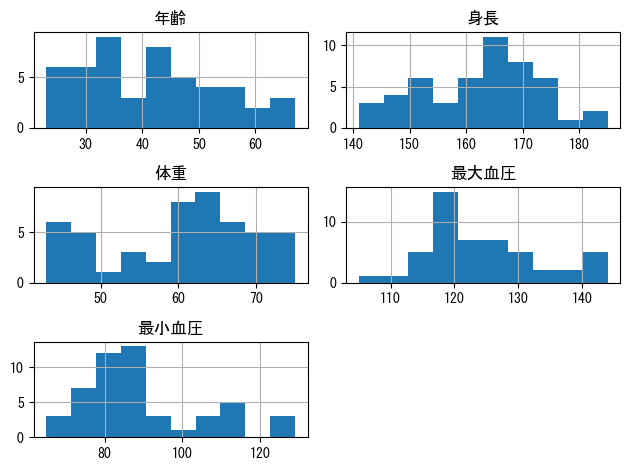

In [96]:
#各数値データのヒストグラムを表示
data_frame.hist()
plt.tight_layout()

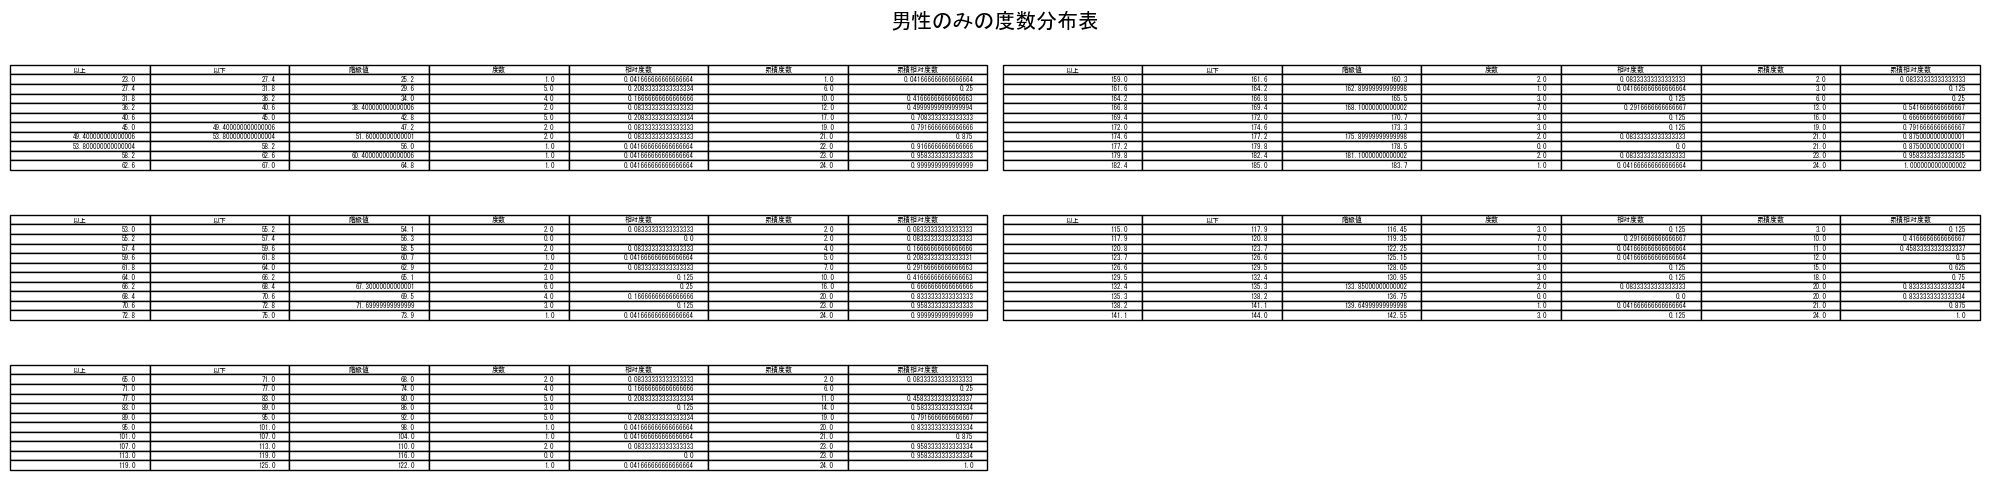

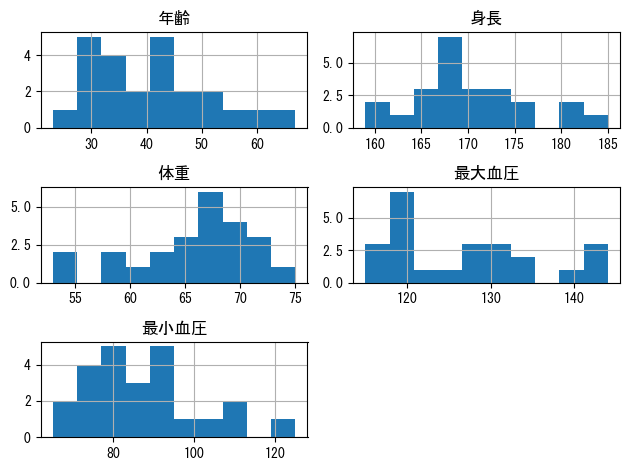

In [97]:
#男性のみのデータフレームを作成
male_df = data_frame[data_frame['性別'] == 'm']

plot_table(male_df, "男性のみの度数分布表")

#ヒストグラム
male_df.hist()
plt.tight_layout()

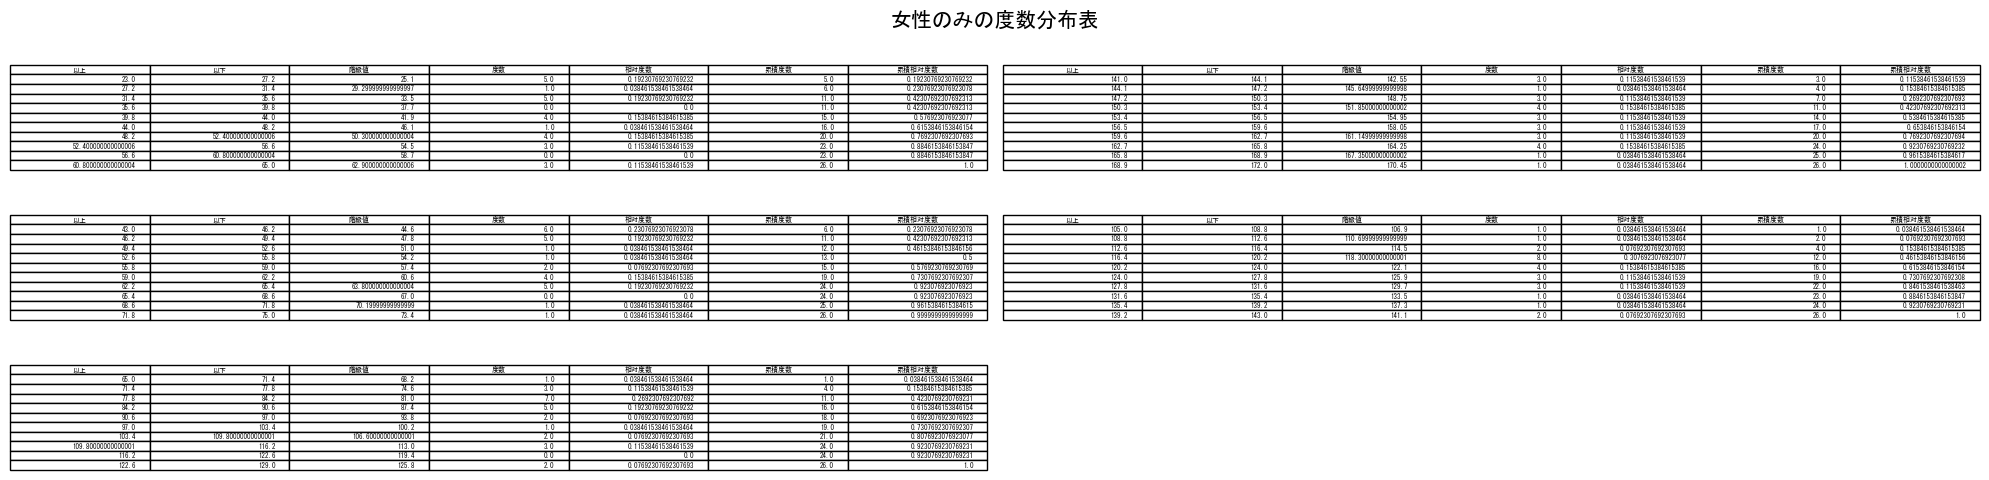

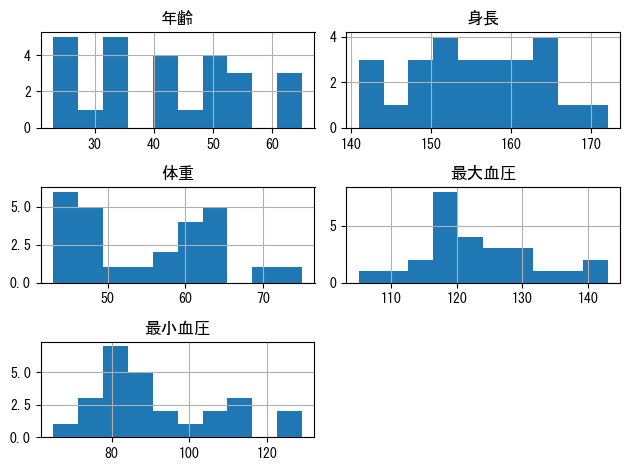

In [98]:
#女性のみのデータフレームを作成
female_df = data_frame[data_frame['性別'] == 'f']

plot_table(female_df, "女性のみの度数分布表")

female_df.hist()
plt.tight_layout()

In [99]:
#相関比の算出関数
def correlation_ratio(categories:pd.Series, values:pd.Series):
    """_summary_
    量的データと質的データの関連指標である相関比を計算し返却する
    Args:
        np_categories (pd.DataFrame): 比較するカテゴリ1
        np_values (pd.DataFrame): 比較するカテゴリ2

    Returns:
        相関比の値η
    """
    np_categories: np.ndarray = np.array(categories) 
    np_values: np.ndarray = np.array(values)
    
    ssw = 0
    ssb = 0
    for category in set(np_categories):
        subgroup = np_values[np.where(np_categories == category)[0]]
        ssw += sum((subgroup-np.mean(subgroup))**2)
        ssb += len(subgroup)*(np.mean(subgroup)-np.mean(np_values))**2
    try:
        result = (ssb / (ssb + ssw))**.5
    except ZeroDivisionError:
        result = None
    return result


#クラメールの関連係数の算出関数
def cramers_value(x:pd.Series, y:pd.Series):
    """_summary_
    質的データ同士の関連指標である、クラメールの関連係数を計算し返却する
    Args:
        np_categories (pd.DataFrame): 比較するカテゴリ1
        np_values (pd.DataFrame): 比較するカテゴリ2

    Returns:
        クラメールの関連係数の値
    """
    table = np.array(pd.crosstab(x, y)).astype(np.float32)
    n = table.sum()
    colsum = table.sum(axis=0)
    rowsum = table.sum(axis=1)
    expect = np.outer(rowsum, colsum) / n
    chisq = np.sum((table - expect) ** 2 / expect)
    try:
        result = np.sqrt(chisq / (n * (np.min(table.shape) - 1)))
        return result
    except ZeroDivisionError:
        return None

In [100]:
#全性別の相関比
print(data_frame)
#年齢と血圧判定
age_bld_prs = correlation_ratio(data_frame["血圧判定"],data_frame['年齢'])
print("年齢と血圧判定の相関比:η = {}".format(age_bld_prs))
#身長と血圧判定
height_bld_prs = correlation_ratio(data_frame["血圧判定"],data_frame['身長'])
print("身長と血圧判定の相関比:η = {}".format(height_bld_prs))
#体重と血圧判定
weight_bld_prs = correlation_ratio(data_frame["血圧判定"],data_frame['体重'])
print("体重と血圧判定の相関比:η = {}".format(weight_bld_prs))
#最大血圧と血圧判定
max_blood_pressure_bld_prs = correlation_ratio(data_frame["血圧判定"],data_frame['最大血圧'])
print("最大血圧と血圧判定の相関比:η = {}".format(max_blood_pressure_bld_prs))
#最小血圧と血圧判定
min_blood_pressure_bld_prs = correlation_ratio(data_frame["血圧判定"],data_frame['最小血圧'])
print("最小血圧と血圧判定の相関比:η = {}".format(min_blood_pressure_bld_prs))



   性別  年齢   身長  体重  最大血圧  最小血圧 血圧判定 心電図判定
0   m  53  167  75   144    80    D     D
1   f  55  153  64   143   110    D     C
2   m  43  168  68   119    90    B     B
3   m  28  175  72   115    82    A     A
4   f  29  160  48   120    80    A     A
5   f  64  154  65   130   105    B     C
6   f  32  165  49   120    75    A     A
7   m  38  171  65   115    75    A     A
8   m  42  167  70   132    90    C     D
9   m  29  180  68   118    80    A     A
10  f  55  148  45   128    75    B     A
11  f  40  155  63   123    83    A     A
12  f  65  147  75   132   110    B     C
13  f  43  153  57   118   100    A     A
14  m  40  169  70   134    85    C     D
15  m  67  165  63   120    80    A     A
16  f  42  154  60   123    84    A     A
17  f  25  165  62   124    75    A     A
18  m  23  185  70   118    65    A     A
19  f  56  143  43   105    65    A     A
20  f  34  162  51   118    84    A     B
21  f  49  153  45   115    83    A     A
22  m  43  164  65   118    76    

In [101]:
#男性の相関比
#年齢と血圧判定
male_age_bld_prs = correlation_ratio(male_df["血圧判定"],male_df['年齢'])
print("年齢と血圧判定の相関比:η = {}".format(male_age_bld_prs))
#身長と血圧判定
male_height_bld_prs = correlation_ratio(male_df["血圧判定"],male_df['身長'])
print("身長と血圧判定の相関比:η = {}".format(male_height_bld_prs))
#体重と血圧判定
male_weight_bld_prs = correlation_ratio(male_df["血圧判定"],male_df['体重'])
print("体重と血圧判定の相関比:η = {}".format(male_weight_bld_prs))
#最大血圧と血圧判定
male_max_blood_pressure_bld_prs = correlation_ratio(male_df["血圧判定"],male_df['最大血圧'])
print("最大血圧と血圧判定の相関比:η = {}".format(male_max_blood_pressure_bld_prs))
#最小血圧と血圧判定
male_min_blood_pressure_bld_prs = correlation_ratio(male_df["血圧判定"],male_df['最小血圧'])
print("最小血圧と血圧判定の相関比:η = {}".format(male_min_blood_pressure_bld_prs))

年齢と血圧判定の相関比:η = 0.4791858389837422
身長と血圧判定の相関比:η = 0.37384041915468696
体重と血圧判定の相関比:η = 0.6324398893903872
最大血圧と血圧判定の相関比:η = 0.8650269650837211
最小血圧と血圧判定の相関比:η = 0.6386525083886394


In [103]:
#女性の相関比


#年齢と血圧判定
female_age_bld_prs = correlation_ratio(female_df["血圧判定"],female_df['年齢'])
print("年齢と血圧判定の相関比:η = {}".format(female_age_bld_prs))
#身長と血圧判定
female_height_bld_prs = correlation_ratio(female_df["血圧判定"],female_df['身長'])
print("身長と血圧判定の相関比:η = {}".format(female_height_bld_prs))
#体重と血圧判定
female_weight_bld_prs = correlation_ratio(female_df["血圧判定"],female_df['体重'])
print("体重と血圧判定の相関比:η = {}".format(female_weight_bld_prs))
#最大血圧と血圧判定
female_max_blood_pressure_bld_prs = correlation_ratio(female_df["血圧判定"],female_df['最大血圧'])
print("最大血圧と血圧判定の相関比:η = {}".format(female_max_blood_pressure_bld_prs))
#最小血圧と血圧判定
female_min_blood_pressure_bld_prs = correlation_ratio(female_df["血圧判定"],female_df['最小血圧'])
print("最小血圧と血圧判定の相関比:η = {}".format(female_min_blood_pressure_bld_prs))


年齢と血圧判定の相関比:η = 0.692681682066972
身長と血圧判定の相関比:η = 0.40398459521924435
体重と血圧判定の相関比:η = 0.5230253140469021
最大血圧と血圧判定の相関比:η = 0.8495219652760219
最小血圧と血圧判定の相関比:η = 0.750709779922689
